In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ds=pd.read_csv('loan_application.csv')
ds

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df=pd.DataFrame(data=ds)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [9]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
df.dtypes.sort_values(ascending=False)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
Property_Area         object
Loan_Status           object
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
ApplicantIncome        int64
dtype: object

In [25]:
#Filling the missing values

In [26]:
from sklearn.impute import SimpleImputer

In [27]:
sim=SimpleImputer(strategy='most_frequent')
list1=['Gender','Married','Dependents','Self_Employed']

for i in list1:
    df[i]=sim.fit_transform(df[i].values.reshape(-1,1))
    

In [33]:
sim=SimpleImputer(strategy='mean')

list2=['LoanAmount','Loan_Amount_Term','Credit_History']
for i in list2:
    df[i]=sim.fit_transform(df[i].values.reshape(-1,1))


In [34]:
#rechecking missing data

In [35]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

There are no missing values in the dataset

In [36]:
#Converting string data into integer

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [44]:
list3=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for i in list3:
    df[i]=le.fit_transform(df[i].astype(str))
    
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


Objects has been converted into integers successfully

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Loan_ID,614.0,306.500000,177.390811,0.0,153.25,306.5,459.75,613.0
Gender,614.0,0.817590,0.386497,0.0,1.00,1.0,1.00,1.0
Married,614.0,0.653094,0.476373,0.0,0.00,1.0,1.00,1.0
Dependents,614.0,0.744300,1.009623,0.0,0.00,0.0,1.00,3.0
Education,614.0,0.218241,0.413389,0.0,0.00,0.0,0.00,1.0
Self_Employed,614.0,0.133550,0.340446,0.0,0.00,0.0,0.00,1.0
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.000000,64.372489,12.0,360.00,360.0,360.00,480.0


Key Observations:
1. The mean of ApplicantIncome is greater than the 50th percentile(midian) signifying skewness
2. There is a significant gap between the 75th percentile and the maximum value for ApplicantIncome,CoapplicantIncome, LoanAmount, and LoanAmountTerm signifying the presence of outliers


In [48]:
#Checking correlation

In [49]:
df.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.035684,-0.028945,-0.032429,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.028945,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974


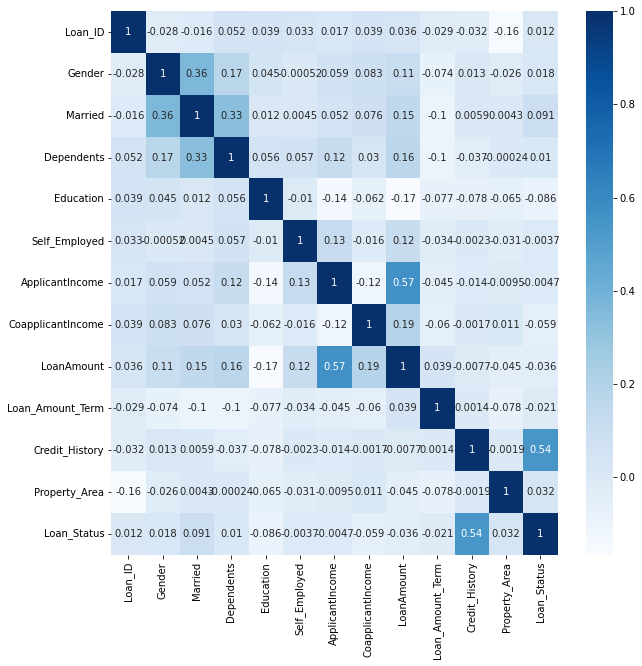

In [55]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

In [52]:
df.corr()['Loan_Status'].sort_values(ascending=True)

Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.020974
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Loan_ID              0.011773
Gender               0.017987
Property_Area        0.032112
Married              0.091478
Credit_History       0.540483
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

Key Observations:
1. There is a high positive correlation between loan status and credit history 
2. Loan status highly correlates negatively with Education
3. Self employed column almost have no correlation with loan status
4. The highest positive correlation in the dataset is between loan amount and applicant income
5. The highest negative correlation in the dataset is between loan amount and education

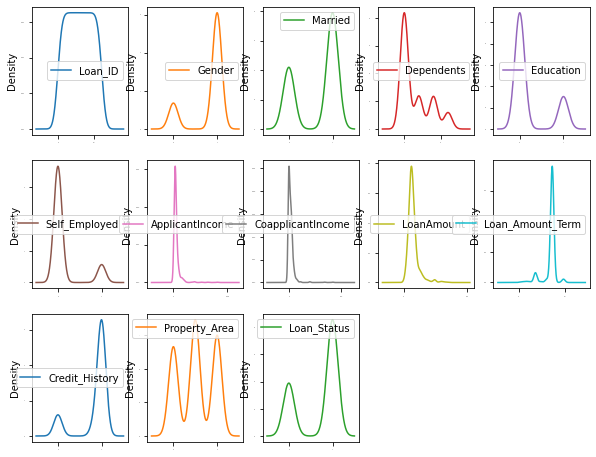

In [59]:
df.plot(kind='density',subplots=True,sharex=False,figsize=(10,8),fontsize=1,layout=(3,5))
plt.show()

In [61]:
x=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

In [70]:
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-2.156241,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.544331,-1.102837,0.235387,0.185905,0.514063,1.193567
1,-2.131291,0.472343,0.728816,0.854259,-0.528362,-0.392601,0.170974,0.750578,-0.037659,0.185905,0.514063,-1.350003
2,-2.109873,0.472343,0.728816,-0.827104,-0.528362,2.547117,-0.499955,-1.102837,-1.346305,0.185905,0.514063,1.193567
3,-2.090468,0.472343,0.728816,-0.827104,1.892641,-0.392601,-0.743873,0.891686,-0.167886,0.185905,0.514063,1.193567
4,-2.072435,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.582817,-1.102837,0.158610,0.185905,0.514063,1.193567
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.536913,-2.117107,-1.372089,-0.827104,-0.528362,-0.392601,-0.554885,-1.102837,-1.205100,0.185905,0.514063,-1.350003
610,1.541258,0.472343,0.728816,1.522278,-0.528362,-0.392601,-0.000290,-1.102837,-2.293317,-2.308570,0.514063,-1.350003
611,1.545601,0.472343,0.728816,0.854259,-0.528362,-0.392601,1.023487,0.208603,1.372409,0.185905,0.514063,1.193567
612,1.549942,0.472343,0.728816,1.316702,-0.528362,-0.392601,0.931750,-1.102837,0.738924,0.185905,0.514063,1.193567


In [64]:
x.skew().sort_values(ascending=True)

Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Gender              -1.648795
Married             -0.644850
Property_Area       -0.066196
Loan_ID              0.000000
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
LoanAmount           2.726601
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
dtype: float64

In [56]:
#checking skewness

In [66]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x_new

array([[-2.15624076,  0.47234264, -1.37208932, ...,  0.18590509,
         0.51406263,  1.1935668 ],
       [-2.1312907 ,  0.47234264,  0.72881553, ...,  0.18590509,
         0.51406263, -1.35000343],
       [-2.10987278,  0.47234264,  0.72881553, ...,  0.18590509,
         0.51406263,  1.1935668 ],
       ...,
       [ 1.5456009 ,  0.47234264,  0.72881553, ...,  0.18590509,
         0.51406263,  1.1935668 ],
       [ 1.54994198,  0.47234264,  0.72881553, ...,  0.18590509,
         0.51406263,  1.1935668 ],
       [ 1.554281  , -2.11710719, -1.37208932, ...,  0.18590509,
        -2.2471956 ,  0.00236103]])

In [68]:
pd.DataFrame(x_new,columns=x.columns).skew().sort_values(ascending=True)

Gender              -1.648795
Credit_History      -1.599912
Married             -0.644850
Loan_ID             -0.287022
Property_Area       -0.158267
CoapplicantIncome   -0.145646
ApplicantIncome     -0.092946
LoanAmount           0.024376
Loan_Amount_Term     0.389827
Dependents           0.441404
Education            1.367622
Self_Employed        2.159796
dtype: float64

Skewness has been reduced

In [69]:
x=pd.DataFrame(x_new,columns=x.columns)
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-2.156241,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.544331,-1.102837,0.235387,0.185905,0.514063,1.193567
1,-2.131291,0.472343,0.728816,0.854259,-0.528362,-0.392601,0.170974,0.750578,-0.037659,0.185905,0.514063,-1.350003
2,-2.109873,0.472343,0.728816,-0.827104,-0.528362,2.547117,-0.499955,-1.102837,-1.346305,0.185905,0.514063,1.193567
3,-2.090468,0.472343,0.728816,-0.827104,1.892641,-0.392601,-0.743873,0.891686,-0.167886,0.185905,0.514063,1.193567
4,-2.072435,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.582817,-1.102837,0.158610,0.185905,0.514063,1.193567
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.536913,-2.117107,-1.372089,-0.827104,-0.528362,-0.392601,-0.554885,-1.102837,-1.205100,0.185905,0.514063,-1.350003
610,1.541258,0.472343,0.728816,1.522278,-0.528362,-0.392601,-0.000290,-1.102837,-2.293317,-2.308570,0.514063,-1.350003
611,1.545601,0.472343,0.728816,0.854259,-0.528362,-0.392601,1.023487,0.208603,1.372409,0.185905,0.514063,1.193567
612,1.549942,0.472343,0.728816,1.316702,-0.528362,-0.392601,0.931750,-1.102837,0.738924,0.185905,0.514063,1.193567


In [73]:
#checking inbalance in data

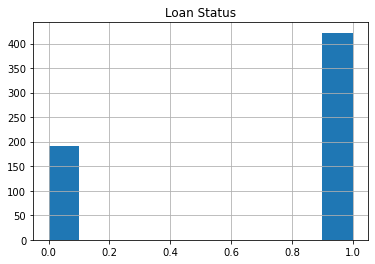

1    422
0    192
Name: Loan_Status, dtype: int64

In [80]:
df['Loan_Status'].hist()
plt.title('Loan Status')
plt.show()

df['Loan_Status'].value_counts()

In [82]:
le.inverse_transform([0,1])

array(['N', 'Y'], dtype=object)

Y is represented by 1 and N by 0

In [78]:
#Correcting inbalance

In [87]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()

import warnings
warnings.filterwarnings('ignore')

In [92]:
x,y=smt.fit_resample(x,y)

In [93]:
x.value_counts()

Loan_ID    Gender     Married    Dependents  Education  Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area
-2.156241   0.472343  -1.372089  -0.827104   -0.528362  -0.392601       0.544331        -1.102837           0.235387    0.185905          0.514063        1.193567        1
 0.662919   0.472343   0.728816  -0.827104   -0.528362  -0.392601      -2.334641         0.943791          -0.306458    0.185905          0.514063       -1.350003        1
 0.570233  -2.117107  -1.372089  -0.827104   -0.528362  -0.392601      -1.661297         0.806002          -0.473815    0.185905         -2.247196        0.002361        1
 0.575142   0.472343   0.728816   1.316702    1.892641  -0.392601      -0.561055        -1.102837          -2.073994   -2.308570         -2.247196        1.193567        1
 0.580048   0.472343  -1.372089  -0.827104    1.892641  -0.392601      -0.638354        -1.102837          -1.375729   -1.015461          0.51406

In [94]:
y.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

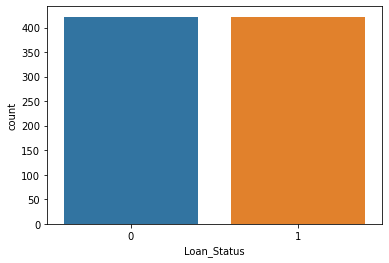

In [99]:
sns.countplot(y)

In [100]:
#checking outliers

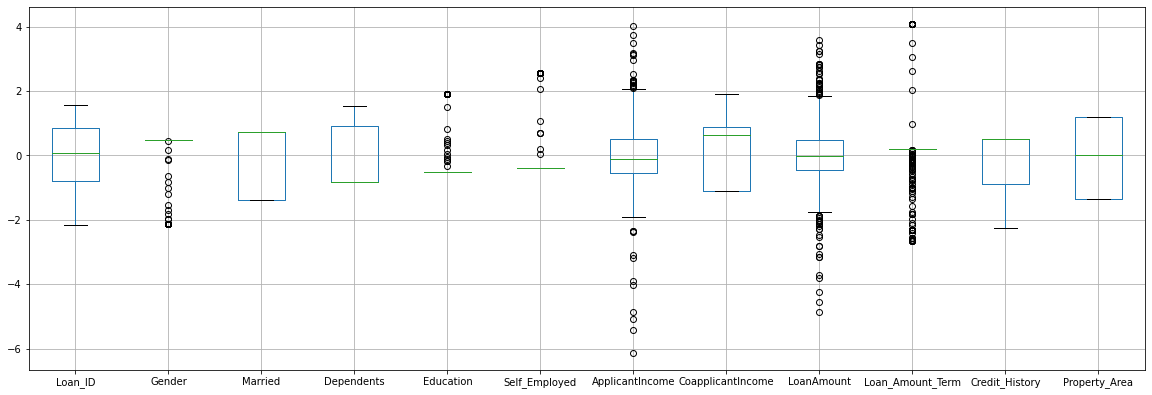

In [105]:
x.boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

The figure shows the existence of outliers

In [106]:
#confirming outliers

In [107]:
from scipy.stats import zscore

In [109]:
zscore(df)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,-1.729232,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.279851,0.451640,1.223298,0.674519
1,-1.723590,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.279851,0.451640,-1.318513,-1.482537
2,-1.717948,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.279851,0.451640,1.223298,0.674519
3,-1.712307,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.279851,0.451640,1.223298,0.674519
4,-1.706665,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.279851,0.451640,1.223298,0.674519
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.706665,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.410130,-0.554487,-0.898095,0.279851,0.451640,-1.318513,0.674519
610,1.712307,0.472343,0.728816,2.236021,-0.528362,-0.392601,-0.212557,-0.554487,-1.267279,-2.518655,0.451640,-1.318513,0.674519
611,1.717948,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.437174,-0.472404,1.269371,0.279851,0.451640,1.223298,0.674519
612,1.723590,0.472343,0.728816,1.244745,-0.528362,-0.392601,0.357064,-0.554487,0.483367,0.279851,0.451640,1.223298,0.674519


In [110]:
z=np.abs(zscore(df))
z

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.729232,0.472343,1.372089,0.737806,0.528362,0.392601,0.072991,0.554487,0.000000,0.279851,0.451640,1.223298,0.674519
1,1.723590,0.472343,0.728816,0.253470,0.528362,0.392601,0.134412,0.038732,0.219273,0.279851,0.451640,1.318513,1.482537
2,1.717948,0.472343,0.728816,0.737806,0.528362,2.547117,0.393747,0.554487,0.957641,0.279851,0.451640,1.223298,0.674519
3,1.712307,0.472343,0.728816,0.737806,1.892641,0.392601,0.462062,0.251980,0.314547,0.279851,0.451640,1.223298,0.674519
4,1.706665,0.472343,1.372089,0.737806,0.528362,0.392601,0.097728,0.554487,0.064454,0.279851,0.451640,1.223298,0.674519
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.706665,2.117107,1.372089,0.737806,0.528362,0.392601,0.410130,0.554487,0.898095,0.279851,0.451640,1.318513,0.674519
610,1.712307,0.472343,0.728816,2.236021,0.528362,0.392601,0.212557,0.554487,1.267279,2.518655,0.451640,1.318513,0.674519
611,1.717948,0.472343,0.728816,0.253470,0.528362,0.392601,0.437174,0.472404,1.269371,0.279851,0.451640,1.223298,0.674519
612,1.723590,0.472343,0.728816,1.244745,0.528362,0.392601,0.357064,0.554487,0.483367,0.279851,0.451640,1.223298,0.674519


In [111]:
(np.abs(zscore(df))<3).all().all()

False

In [112]:
#removing outliers from the dataset

In [113]:
df_new=df[(z<3).all(axis=1)]
df_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [116]:
print('New data:', df_new.shape)
print('Old data:', df.shape)
print('Total outliers removed:', df.shape[0]-df_new.shape[0])

New data: (577, 13)
Old data: (614, 13)
Total outliers removed: 37


In [118]:
x=df_new.drop(['Loan_Status'],axis=1)
y=df_new['Loan_Status']

In [119]:
#Scaling the x data

In [121]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [122]:
for col in x:
    mms=MinMaxScaler()
    x[col]=mms.fit_transform(x[[col]])

In [133]:
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.277770,0.000000,0.370383,0.6,1.0,1.0
1,0.001631,1.0,1.0,0.333333,0.0,0.0,0.216065,0.167929,0.320755,0.6,1.0,0.0
2,0.003263,1.0,1.0,0.000000,0.0,1.0,0.138909,0.000000,0.153639,0.6,1.0,1.0
3,0.004894,1.0,1.0,0.000000,1.0,0.0,0.118585,0.262584,0.299191,0.6,1.0,1.0
4,0.006525,1.0,0.0,0.000000,0.0,0.0,0.285129,0.000000,0.355795,0.6,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.993475,0.0,0.0,0.000000,0.0,0.0,0.134035,0.000000,0.167116,0.6,1.0,0.0
610,0.995106,1.0,1.0,1.000000,0.0,0.0,0.192816,0.000000,0.083558,0.0,1.0,0.0
611,0.996737,1.0,1.0,0.333333,0.0,0.0,0.386119,0.026726,0.657682,0.6,1.0,1.0
612,0.998369,1.0,1.0,0.666667,0.0,0.0,0.362285,0.000000,0.479784,0.6,1.0,1.0


In [124]:
#training data

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression 


In [130]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=45)
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [132]:
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8045977011494253
[[ 28  33]
 [  1 112]]
              precision    recall  f1-score   support

           0       0.97      0.46      0.62        61
           1       0.77      0.99      0.87       113

    accuracy                           0.80       174
   macro avg       0.87      0.73      0.75       174
weighted avg       0.84      0.80      0.78       174



In [134]:
def loanpredict(p):
    p=p.reshape(1,-1)    
    pred=lg.predict(p)
    print('Predicted value',pred)
    if pred==0:
        print("The client's loan status is N")
    else :
        print("The client's loan status is Y")

In [136]:
p=np.array([0.001631,1.0,1.0,0.333333,0.0,0.0,0.216065,0.167929,0.320755,0.6,1.0,0.0])
loanpredict(p)

Predicted value [1]
The client's loan status is Y


This indicates that the client's loan will be approved.